# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
!pip install pandas
import pandas as pd 
# Create two new dataframes
north_df= pd.read_csv(r'C:\Users\Sabria\Desktop\Python\call-center-cleanup-assignment\\NorthCallCenter.csv')
south_df = pd.read_csv(r'C:\Users\Sabria\Desktop\Python\call-center-cleanup-assignment\\SouthCallCenter.csv')

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [13]:
# EDA Question 1A solution below:
north_df['Rep ID'].nunique()


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [14]:
# EDA Question 1B solution Below:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [11]:
# EDA Question 2A solution Below:
average_north = round(north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean(axis=0),2)

print(average_north)

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [12]:
# EDA Question 2B solution Below:

average_south= round(south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean(axis=0),2)
#all wrong

print(average_south)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [15]:
# EDA Question 3 solution Below:
north_calls_per_timeblock = north_df.groupby(['Time Block'])['Calls'].sum()
print(total_calls_per_timeblock)

south_calls_per_timeblock = south_df.groupby(['Time Block'])['Calls'].sum()
print(total_calls_per_timeblock)

total_calls_per_timeblock = north_calls_per_timeblock.add(south_calls_per_timeblock, fill_value=0)
print(total_calls_per_timeblock)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


#### Record your answers below:

1A)
 9 reps
1B)
 11 reps 
2A)
Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
2B)
Busy Minutes             10.05
Not Ready Minutes        1.91
Incoming Wait Time       3.00
During Call Wait Time    3.08
3)
9:00 AM:    10	
10:00 AM	99
11:00 AM	56
12:00 AM:   120
1:00 PM:	40
2:00 PM:	65
3:00 PM:	73
4:00 PM:	53
5:00 PM:	43


## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [4]:
# Question 1 solution below
import pandas as pd
import numpy as np

for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

print()

for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna(0)
display(north_df["Incoming Wait Time"])


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 0%
During Call Wait Time - 0%
Calls - 0%
two_second_wait - 0%

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
240    0.0
241    0.0
242    0.0
243    0.0
244    0.0
Name: Incoming Wait Time, Length: 245, dtype: float64

#### Record your answer below:

> Your Answer: Depending on the percentage of the missing data, I would either drop it or fill NaaN with something else according to the context. In this case, Incoming Wait Time has 60% missing data, but also has 40% data. Therefore, I would just use the 40% to do my analysis. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [52]:
# Cleaning Question 2 solution below:

print(north_df['Sale'].unique())

north_df['Sale']= north_df['Sale'].str.rstrip()

print(north_df['Sale'].unique())


['NO' 'YES']
['NO' 'YES']


##### Record your answer by below:
> Your Answer:  I first find the unique values that are shown in the "Sale' column and it showed 2 'YES'; one with a trailing space and one without one. Then I used "str.rstrip()' to remove any unwanted spaces from the end of the strings. Afterwards, I check to see if it fixed the problem with unique; it shows only one 'yes' which shows that it is fixed. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [18]:
# Cleaning Question 3 solution below: 
north_df.duplicated().sum()
south_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: There are no duplicates on the dataset. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [17]:
# Cleaning Question 4 solution below:
#north_df = north_df.drop(["COLUMN"], axis=1) 
#south_df = south_df.drop(["COLUMN"], axis=1) = how I would code it.  

##### Record your answer below:
> Your Answer: I did not find any data that was not necessary for analysis. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [17]:
# Create dataframe for the entire company named df
import pandas as pd
import numpy as np

df = pd.concat([north_df, south_df])
#combining two data frames to a combined dataframe 
print(df.info())
#printing general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: float64(

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [10]:
# Manipulation Question solution below:
# what does it mean by sum the resulting structure?
number_of_calls = df.groupby(["Rep ID", "Branch"])["Calls"].sum()

sorted_calls = number_of_calls.sort_values(ascending=False)
print(sorted_calls)

Rep ID  Branch
Brent   North     37
Eric    South     35
Randy   South     33
Sandy   South     32
Helga   South     31
Lilly   North     30
George  South     29
Kate    South     29
Todd    North     29
Duke    North     29
Karl    South     28
Joe     North     26
Susan   South     26
Josh    South     26
Sharon  South     25
Cam     North     24
Xander  North     24
Amanda  North     23
Andy    North     23
Alice   South     20
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent and 37
- South Branch = Eric and 35 

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [26]:
# Manipulation Question 2 solution below:
#abandoned calls/calls -look at north and south and then together group calls by branch and find the percentage

north_abandoned = north_df['Abandoned'].sum()
north_total_calls = north_df['Calls'].sum()

percentage_abandonment_rate = round((north_abandoned/north_total_calls)*100,2)
abandonment_rate_percentage = f"{percentage_abandonment_rate}%"
print(abandonment_rate_percentage)

south_abandoned = south_df['Abandoned'].sum()
south_total_calls = south_df['Calls'].sum()

percentage_abandonment_rate = round((south_abandoned/south_total_calls)*100,2)
abandonment_rate_percentage = f"{percentage_abandonment_rate}%"
print(abandonment_rate_percentage)


df_abandoned = df['Abandoned'].sum()
df_total_calls = df['Calls'].sum()

percentage_abandonment_rate = round((df_abandoned/df_total_calls)*100,2)
abandonment_rate_percentage = f"{percentage_abandonment_rate}%"
print(abandonment_rate_percentage)

2.86%
1.27%
1.97%


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, it falls below 2%.  

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [39]:
# Manipulation Question 3 solution below: Incoming Wait Time. group by branch -conditional to find each call that
#falls within the 2 seconds - assume that NaaN - 0 

#north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(0)

import numpy as np

north_df.loc[north_df['Incoming Wait Time'] == 0, 'Incoming Wait Time'] = np.nan

def two_second_wait(row):
    time = row['Incoming Wait Time']
    if time <= 2:
        return True 
    else:
        return False
north_df["two_second_wait"] = north_df.apply(two_second_wait, axis=1)
counts = north_df["two_second_wait"].value_counts()
print(counts)


total_calls = north_df['Incoming Wait Time'].count()
print(total_calls)

true_count = counts.get(True,0)
if total_calls !=0:
    ratio = true_count / total_calls
    print(f"percentage of calls answered within 2 seconds: {ratio * 100:.2f}%")
else:
    print(f"division not possible.")

print(type(counts))

print()

south_df.loc[south_df['Incoming Wait Time'] == 0, 'Incoming Wait Time'] = np.nan

def two_second_wait(row):
    time = row['Incoming Wait Time']
    if time <= 2:
        return True 
    else:
        return False
south_df["two_second_wait"] = south_df.apply(two_second_wait, axis=1)
counts2 = south_df["two_second_wait"].value_counts()
print(counts2)


total_calls = south_df['Incoming Wait Time'].count()

true_count = counts2.get(True,0)
if total_calls !=0:
    ratio = true_count / total_calls
    print(f"percentage of calls answered within 2 seconds: {ratio * 100:.2f}%")
else:
    print(f"division not possible.")

print()

df.loc[df['Incoming Wait Time'] == 0, 'Incoming Wait Time'] = np.nan

def two_second_wait(row):
    time = row['Incoming Wait Time']
    if time <= 2:
        return True 
    else:
        return False
df["two_second_wait"] = df.apply(two_second_wait, axis=1)
counts3 = df["two_second_wait"].value_counts()
print(counts3)

total_calls = df['Incoming Wait Time'].count()

true_count = counts3.get(True,0)
if total_calls !=0:
    ratio = true_count / total_calls
    print(f"percentage of calls answered within 2 seconds: {ratio * 100:.2f}%")
else:
    print(f"division not possible.")



two_second_wait
False    212
True      33
Name: count, dtype: int64
82
percentage of calls answered within 2 seconds: 40.24%
<class 'pandas.core.series.Series'>

two_second_wait
False    266
True      48
Name: count, dtype: int64
percentage of calls answered within 2 seconds: 38.10%

two_second_wait
False    478
True      81
Name: count, dtype: int64
percentage of calls answered within 2 seconds: 38.94%


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls
- South Branch = 38.10%, 48 calls
- Company Wide = 38.94%, 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [46]:
# Manipulation Question 4 solution below: Incoming Wait Time

average_north = round(north_df['Incoming Wait Time'].mean(),2)
average_south = round(south_df['Incoming Wait Time'].mean(),2)
average_df = round(df['Incoming Wait Time'].mean(),2)

print(average_north)
print(average_south)
print(average_df)


3.05
3.0
3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 sec
- South Branch in seconds = 3.0 sec
- Company Wide in seconds = 3.02 sec

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

Text(0, 0.5, 'Average Abandonment Rate')

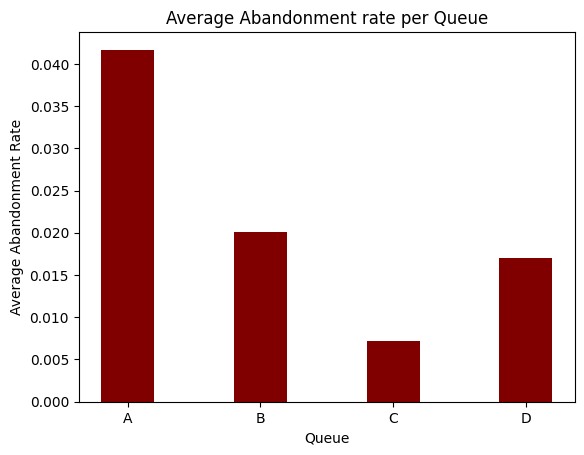

In [14]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

north_df = pd.read_csv(r'C:\Users\Sabria\Desktop\Python\call-center-cleanup-assignment\\NorthCallCenter.csv')
south_df = pd.read_csv(r'C:\Users\Sabria\Desktop\Python\call-center-cleanup-assignment\\SouthCallCenter.csv')

df = pd.concat([north_df, south_df])

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"].iloc[i] / queue_dict["Calls"].iloc[i] 

#Your code below:

plt.bar(x=queues, height= list(abandonment_rates.values()),width=.4, color ='maroon')

plt.title("Average Abandonment rate per Queue")
plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")


##### Record your answer below:

> Chart style you chose and why:
> I chose this style, because I want to compare the values of each queue and this bar chart does that clearly and accurately. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

   Rep ID  Incoming Wait Time  Calls_x  Calls_y  Service Level %
0  Amanda            2.400000        3        5        60.000000
1    Andy            3.600000        3       10        30.000000
2   Brent            2.125000        6        8        75.000000
3     Cam            2.909091        5       11        45.454545
4    Duke            2.785714        6       14        42.857143
5     Joe            3.600000        2       10        20.000000
6   Lilly            3.083333        4       12        33.333333
7    Todd            3.500000        2        6        33.333333
8  Xander            3.333333        2        6        33.333333

41.48% average service level
3.04secs


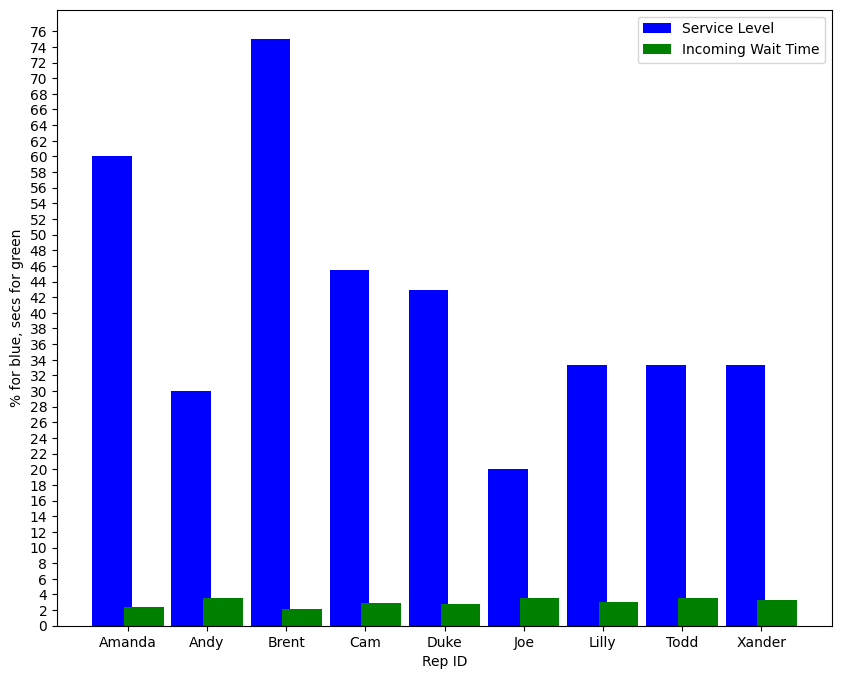

    Rep ID  Incoming Wait Time  Calls_x  Calls_y  Service Level %
0    Alice            2.500000        3        6        50.000000
1     Eric            2.611111       10       18        55.555556
2   George            3.153846        4       13        30.769231
3    Helga            3.272727        3       11        27.272727
4     Josh            3.444444        2        9        22.222222
5     Karl            2.888889        3        9        33.333333
6     Kate            3.363636        3       11        27.272727
7    Randy            2.937500        7       16        43.750000
8    Sandy            2.615385        7       13        53.846154
9   Sharon            3.625000        1        8        12.500000
10   Susan            2.916667        5       12        41.666667

36.2% average service level
3.03secs


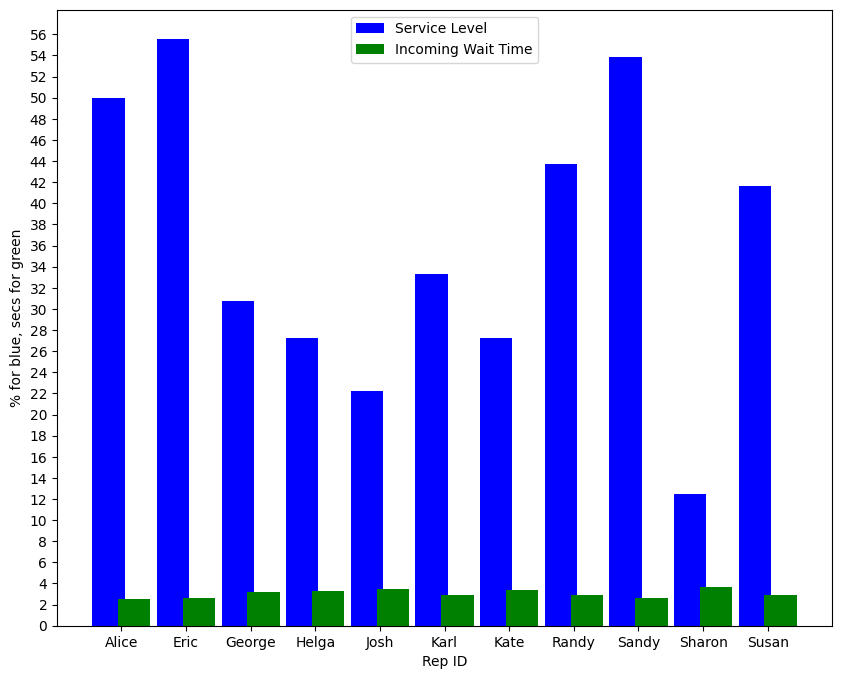

In [24]:
 # Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

!pip install pandas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

north_df = pd.read_csv(r'C:\Users\Sabria\Desktop\Python\call-center-cleanup-assignment\\NorthCallCenter.csv')
south_df = pd.read_csv(r'C:\Users\Sabria\Desktop\Python\call-center-cleanup-assignment\\SouthCallCenter.csv')

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Perecentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

final_stats = pd.merge(north_plt, service_level, on= "Rep ID")
print(final_stats)

rep_ids = final_stats['Rep ID']
service_level = final_stats['Service Level %']
incoming_wait_time = final_stats['Incoming Wait Time']

print()

average = round(service_level.mean(),2)
average_percentage = f"{average}% average service level"
print(average_percentage)

average2 = round(incoming_wait_time.mean(),2)
average_incoming_wait_time = f"{average2}secs"
print(average_incoming_wait_time)

x = np.arange(len(rep_ids))
width = 0.5

#plot data in grouped manner of bar type 
plt.figure(figsize=(10,8))
plt.bar(x-0.2, service_level, width, color='blue')
plt.bar(x+0.2, incoming_wait_time, width, color='green')
plt.xticks(x, rep_ids)
plt.xlabel("Rep ID")
max_y_value = max(service_level.max(), incoming_wait_time.max())
plt.yticks(np.arange(0, max_y_value + 2,2))
plt.ylabel("% for blue, secs for green")
plt.legend(["Service Level", "Incoming Wait Time"])
plt.show()
           

#south_df 

south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Perecentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

final_stats = pd.merge(south_plt, service_level, on= "Rep ID")
print(final_stats)

rep_ids = final_stats['Rep ID']
service_level = final_stats['Service Level %']
incoming_wait_time = final_stats['Incoming Wait Time']

print()

average = round(service_level.mean(),2)
average_percentage = f"{average}% average service level"
print(average_percentage)

average2 = round(incoming_wait_time.mean(),2)
average_incoming_wait_time = f"{average2}secs"
print(average_incoming_wait_time)

x = np.arange(len(rep_ids))
width = 0.5

#plot data in grouped manner of bar type 
plt.figure(figsize=(10,8))
plt.bar(x-0.2, service_level, width, color='blue')
plt.bar(x+0.2, incoming_wait_time, width, color='green')
plt.xticks(x, rep_ids)
plt.xlabel("Rep ID")
max_y_value = max(service_level.max(), incoming_wait_time.max())
plt.yticks(np.arange(0, max_y_value + 2,2))
plt.ylabel("% for blue, secs for green")
plt.legend(["Service Level", "Incoming Wait Time"])
plt.show()

# 41.48% average service level of north, 3.04 incoming wait time average
# 36.20% average service level of south, 3.03 incoming wait time average

##### Record your answer below:

> Chart style you chose and why: I chose this chart style, because it enables me to compare the service level and the incoming wait time of each representative. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


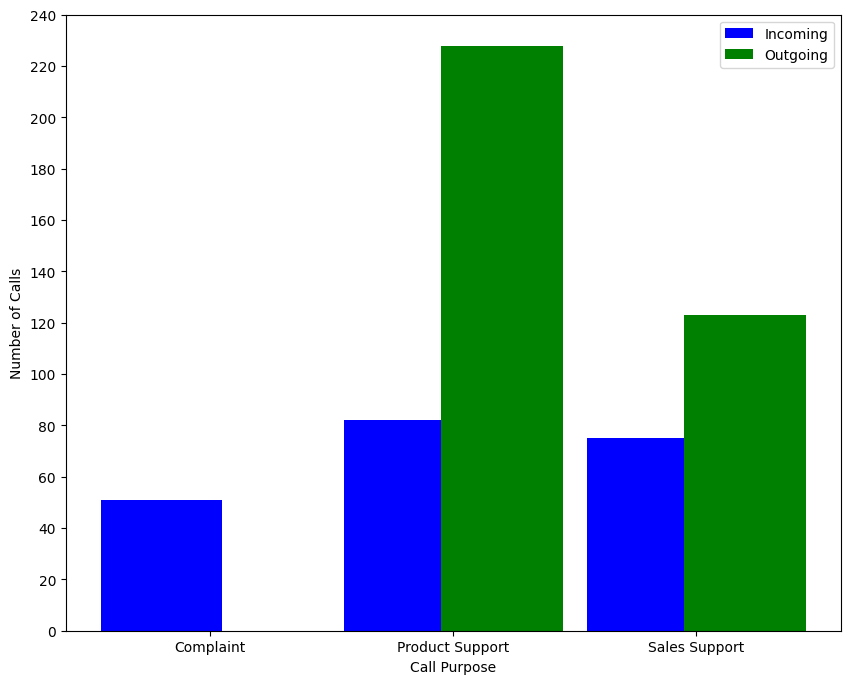

In [11]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.concat([north_df, south_df])

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

categories = ['Complaint', 'Product Support', 'Sales Support']
incoming_counts = [complaints.get('Incoming', 0), product_support.get('Incoming',0), sales_support.get('Incoming',0)]
outgoing_counts = [complaints.get('Outgoing', 0), product_support.get('Outgoing',0), sales_support.get('Outgoing',0)]

x = np.arange(len(categories))
width = 0.5

#plot data in grouped manner of bar type 
plt.figure(figsize=(10,8))
plt.bar(x-0.2, incoming_counts, width, color='blue', label='Incoming')
plt.bar(x+0.2, outgoing_counts, width, color='green', label='Outgoing')
plt.xticks(x, categories)
plt.xlabel("Call Purpose")
max_y_value = max(max(incoming_counts), max(outgoing_counts))
plt.yticks(np.arange(0, max_y_value + 20,20))
plt.ylim(0,240)
plt.ylabel("Number of Calls")
plt.legend(["Incoming", "Outgoing"])
plt.show()


##### Record your answer below:

> Chart style you chose and why: I am able to measure the number of calls, the type of call (outgoing/incoming), and the purpose of the call (complaint,etc) in a simple bar chart. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The North branch is operating more efficiently, because it has a higher service level than the south branch and similar incoming wait time to the south branch. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:
> Considering the 11 representatives in the south branch versus the 8 representatives in the north branch and how quickly they are working, the south branch would benefit from the extra help


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined